### Classification Problem:
  * Given stats / weather data we can get before a game happens, predict whether home team will win or not


In [1]:
from feature_eng import Data
data_obj = Data('./weather_game_elo.csv')

In [13]:
# logistic regression
lr = data_obj.lr()

/Users/sunil/opt/anaconda3/envs/research/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
data_obj.evaluate_test(lr)

accuracy: 0.667578659370725


0.667578659370725

In [16]:
data_obj.single_prediction(lr)

2012-11-18: ATL vs. ARI
lr model predicts ATL will win
with probability 0.5000061353163072
actual game outcome: ATL won
actual score: ATL: 23.0 ARI: 19.0


In [5]:
len(data_obj.home_teams)

2921

In [6]:
data_obj_playoff_enc = Data('./weather_game_elo_playoff_encoded.csv', playoff_encoded=True)

In [13]:
lr_encoded = data_obj_playoff_enc.lr()
data_obj_playoff_enc.evaluate_test(lr_encoded)

accuracy: 0.6662106703146374


0.6662106703146374

In [ ]:
# training accuracy for the encoded logistic regression
data_obj_playoff_enc.evaluate_train(lr_encoded)

### Accuracy Analysis

In [9]:
# logistic regression
from feature_eng import Data
data_obj = Data('./weather_game_elo.csv')
lr = data_obj.lr(normalize=True)
rf = data_obj.rf()
nn = data_obj.neural_net()
res = data_obj.kfold_validation([lr, rf, nn])


LogisticRegression
RandomForestClassifier
MLPClassifier


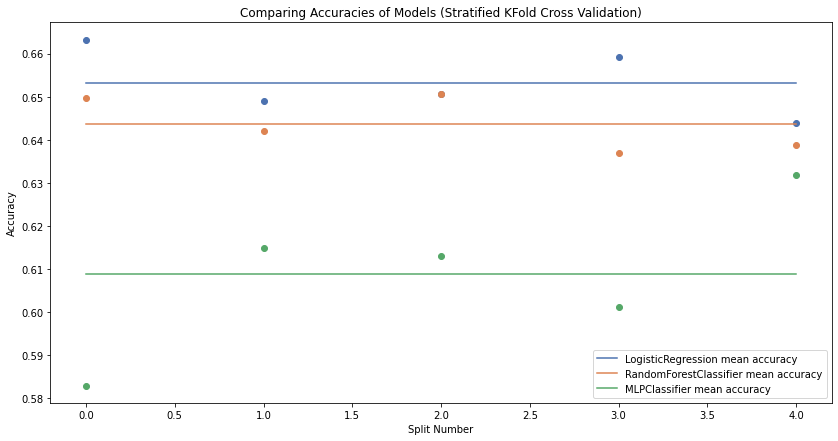

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def graph_accuracies(models, to_pdf=False):
  fig, ax = plt.subplots(figsize=(14, 7))
  ax.set_title('Comparing Accuracies of Models (Stratified KFold Cross Validation)')
  ax.set_xlabel('Split Number')
  ax.set_ylabel('Accuracy')
  splits = len(list(models.items())[0][1])
  palette = sns.color_palette('deep', len(list(models.items())[0][0]))
  
  for j, model_desc in enumerate(models.items()):
    name, model_acc = model_desc
    color = palette[j]
    # loop through each split
    for i in range(splits):
      ax.scatter(i, model_acc[i], color=color)
    mean_acc = np.array(model_acc).mean()
    ax.plot([i for i in range(splits)], [mean_acc for _ in range(splits)], label=f'{name} mean accuracy', color=color)
  ax.legend()
  if to_pdf:
    plt.savefig(
              "accuracy_graph.pdf", format="pdf", bbox_inches="tight", dpi=200
          )
  plt.show()

graph_accuracies(res)
